In [1]:
import h5py as h5
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from scipy.ndimage import gaussian_filter1d
from scipy.ndimage import median_filter

In [2]:
data_path = '/scratch/gpfs/nc1514/plasma-tv/data/external/toksearch/aps_sig.h5'

In [3]:
data = h5.File(data_path, 'r')

In [4]:
print(data.keys())

<KeysViewHDF5 ['201076', '201081', '201085', 'spatial_coordinates', 'times']>


In [5]:
print(data['201085'].keys())

<KeysViewHDF5 ['RXPT1_EFIT01', 'gasA', 'gas_sql', 'ip_flat_duration_sql', 'lfsdz', 'lftdz', 't_ip_flat_sql', "tssdivte00'", 'tssdivte01', 'tssdivte02', 'tssdivte03', 'tssdivte04', 'tssdivte05', 'valve_sql']>


In [6]:
shot = 201076
thomson_dat = []
shot_str = str(shot)
# thomson_dat.append(data[shot_str]["tssdivte00'"][:])
for i in range(1,5):
    thomson_dat.append(data[shot_str][f'tssdivte0{str(i)}'][:])
thomson_dat = np.array(thomson_dat)
gas_dat = data[shot_str]['gasA'][:]
lfsdz_dat = data[shot_str]['lfsdz'][:]
lftdz_dat = data[shot_str]['lftdz'][:]
x_pt = data[shot_str]['RXPT1_EFIT01'][:]
times = data['times'][:]
coords = data['spatial_coordinates'][:]

In [7]:
median_filtered_thomson_dat = np.array([median_filter(thomson_dat[i], size=3) for i in range(4)])

<Figure size 640x480 with 0 Axes>

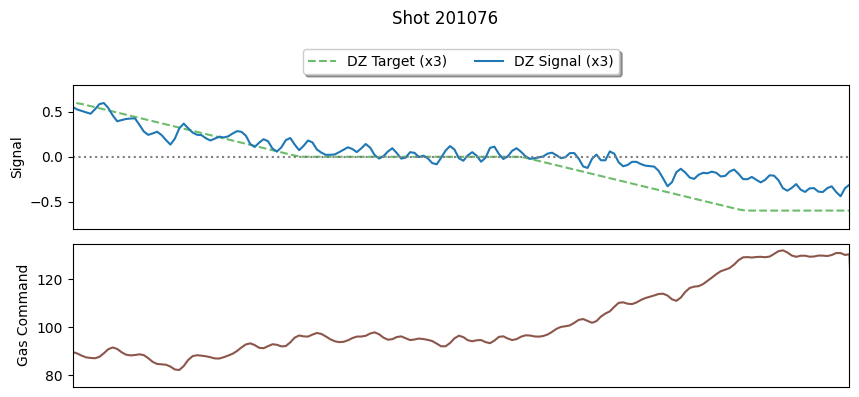

In [10]:
detach = 2850
attach = 4420
detachp100 = detach + 100
attachp100 = attach + 100
xlim = (2000, 5500)
xlim[0], xlim[1]

# Create figure and GridSpec layout
plt.clf()
fig = plt.figure(figsize=(9, 4))
gs = gridspec.GridSpec(2, 2, width_ratios=[50, 1], height_ratios=[1, 1])

# First subplot (row 0, column 0)
ax1ylim = (-0.8, 0.8)
ax1 = plt.subplot(gs[0, 0])
ax1.plot(times, lftdz_dat * 3, c='C2', alpha=0.7, linestyle='--', label='DZ Target (x3)')
ax1.plot(times, lfsdz_dat * 3, label='DZ Signal (x3)')
# ax1.vlines(detach, ax1ylim[0], ax1ylim[1], colors='C1', label='Detach')
# ax1.vlines(attach, ax1ylim[0], ax1ylim[1], colors='C6', label='Reattach')
# ax1.vlines(detachp100, ax1ylim[0], ax1ylim[1], colors='C3', linestyle='dotted',label='Delay')
# ax1.vlines(attachp100, ax1ylim[0], ax1ylim[1], colors='C3', linestyle='dotted')
ax1.hlines(0, xlim[0], xlim[1], colors='C7', linestyle='dotted')
ax1.set_xlim(xlim[0], xlim[1])
ax1.set_ylim(ax1ylim[0], ax1ylim[1])
ax1.set_xticks([])
ax1.set_ylabel('Signal')
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), fancybox=True, shadow=True, ncol=5)

# Second subplot (row 1, column 0)
ax2ylim = (75, 135)
ax2 = plt.subplot(gs[1, 0])
ax2.plot(times, gas_dat, c='C5')
# ax2.vlines(detach, ax2ylim[0], ax2ylim[1], colors='C1', label='Detach')
# ax2.vlines(attach, ax2ylim[0], ax2ylim[1], colors='C6', label='Reattach')
# ax2.vlines(detachp100, ax2ylim[0], ax2ylim[1], colors='C3', linestyle='dotted')
# ax2.vlines(attachp100, ax2ylim[0], ax2ylim[1], colors='C3', linestyle='dotted')
ax2.set_xlim(xlim[0], xlim[1])
ax2.set_ylim(ax2ylim[0], ax2ylim[1])
ax2.set_xticks([])
ax2.set_ylabel('Gas Command')

# # Third subplot (row 2, column 0)
# ax3 = plt.subplot(gs[2, 0])
# cax = ax3.pcolormesh(times, np.arange(1, 5), median_filtered_thomson_dat, cmap='viridis')
# ax3.vlines(detach, 0.5, 4.5, colors='C1', label='Detach')
# # ax3.vlines(attach, 0.5, 4.5, colors='C6', label='Reattach')
# ax3.vlines(detachp100, 0.5, 4.5, colors='C3', linestyle='dotted')
# # ax3.vlines(attachp100, 0.5, 4.5, colors='C3', linestyle='dotted')
# ax3.set_yticks(np.arange(1, 5))
# ax3.set_xlim(xlim[0], xlim[1])
# ax3.set_xlabel('Time (ms)')
# ax3.set_ylabel('#DTS')

# # Colorbar (row 0-2, column 1)
# cbar_ax = plt.subplot(gs[2, 1])  # Use the same row as ax3 (row 2)
# fig.colorbar(cax, cax=cbar_ax, orientation='vertical')
# cbar_ax.set_ylabel('Temperature (eV)')

# Set the overall title and adjust layout
fig.suptitle('Shot ' + shot_str)
plt.tight_layout()
plt.show()